In [579]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [35]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [602]:
wine = pd.concat([red_wine, white_wine])
wine.set_index(np.array(range(len(wine))), inplace = True)

In [613]:
model = PLSRegression()
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.581323667132


In [583]:
model = PLSRegression(scale=False)
score0 = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score0.mean())

-0.674964379926


 scaling seems to work better

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001734EB28390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001734F95C3C8>]], dtype=object)

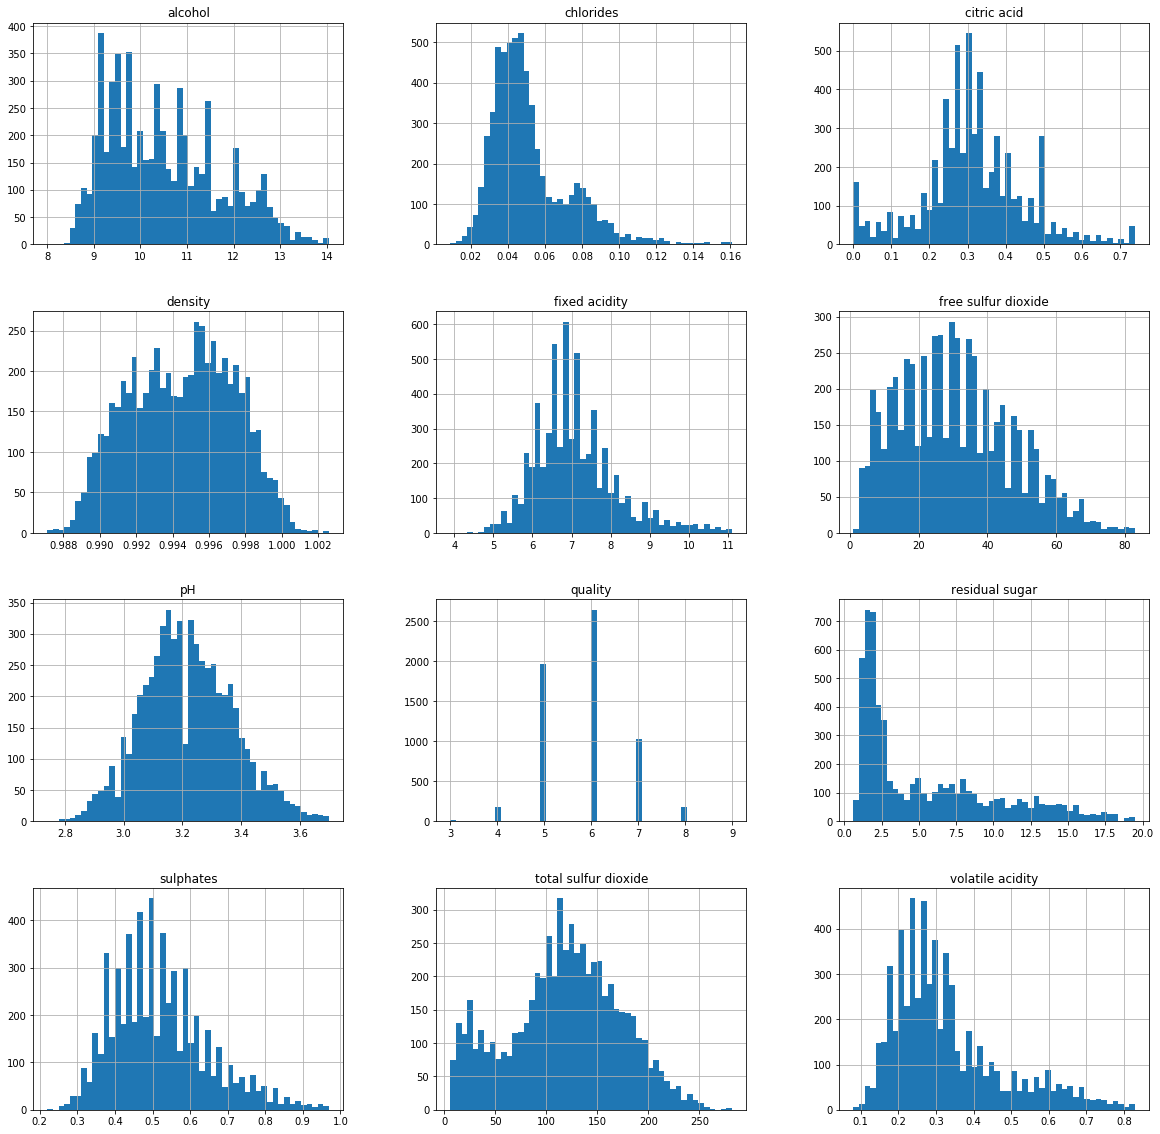

In [558]:
wine.hist(figsize=(20,20), bins=50)

In [589]:
test_data = wine.iloc[:,:-1].copy()

In [590]:
for i in test_data:
    test_data[i] = StandardScaler().fit_transform(test_data[i].values.reshape(-1,1))

test_data['quality'] = wine['quality']

In [591]:
outliers =[]

for i in range(len(test_data)):
    for j in test_data.iloc[i,:-1]:
        if j > 3 or j < -3:
            outliers.append(i)
            
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])

for i in np.array(outliers.index):
    if outliers.loc[i].values < 1:
        outliers.drop(i, inplace=True)

print(len(outliers))
#print(test_data.loc[outliers.index])

488


In [547]:
len(wine)

6497

In [599]:
wine.drop(outliers.index, inplace = True)

In [593]:
len(wine)

6009

In [478]:
score2 = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score2.mean())

-0.66423297604


In [479]:
wine['quality'].value_counts()

6    2636
5    1958
7    1027
8     184
4     184
3      15
9       5
Name: quality, dtype: int64

In [541]:
skew1 = wine.skew()

In [604]:
for i in wine:
    if i in ['quality', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density']:
        print('pass')
        pass
    else:
        wine[i] = np.log1p(wine[i])

pass
pass
pass
pass
pass


In [544]:
skew2 = wine.skew()

In [525]:
skew3 = wine.skew()

In [545]:
abs(skew1) > abs(skew2) 

fixed acidity            True
volatile acidity         True
citric acid             False
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                  True
quality                 False
dtype: bool

In [553]:
skew2

fixed acidity           0.482686
volatile acidity        0.922810
citric acid            -0.290920
residual sugar          0.346510
chlorides               1.358683
free sulfur dioxide    -0.821716
total sulfur dioxide   -1.476683
density                -0.055272
pH                      0.110549
sulphates               0.506755
alcohol                 0.374006
quality                 0.251727
dtype: float64

In [554]:
skew1

fixed acidity           0.935299
volatile acidity        1.149366
citric acid             0.132486
residual sugar          1.033898
chlorides               1.435127
free sulfur dioxide     0.444536
total sulfur dioxide   -0.094406
density                -0.052846
pH                      0.210942
sulphates               0.729154
alcohol                 0.538622
quality                 0.251727
dtype: float64

In [516]:
wine.hist(plt)

fixed acidity           0.482686
volatile acidity        0.922810
citric acid             0.290920
residual sugar          0.346510
chlorides               1.358683
free sulfur dioxide     0.821716
total sulfur dioxide    1.476683
density                 0.055272
pH                      0.110549
sulphates               0.506755
alcohol                 0.374006
quality                 0.251727
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017352843F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017352A50F98>]], dtype=object)

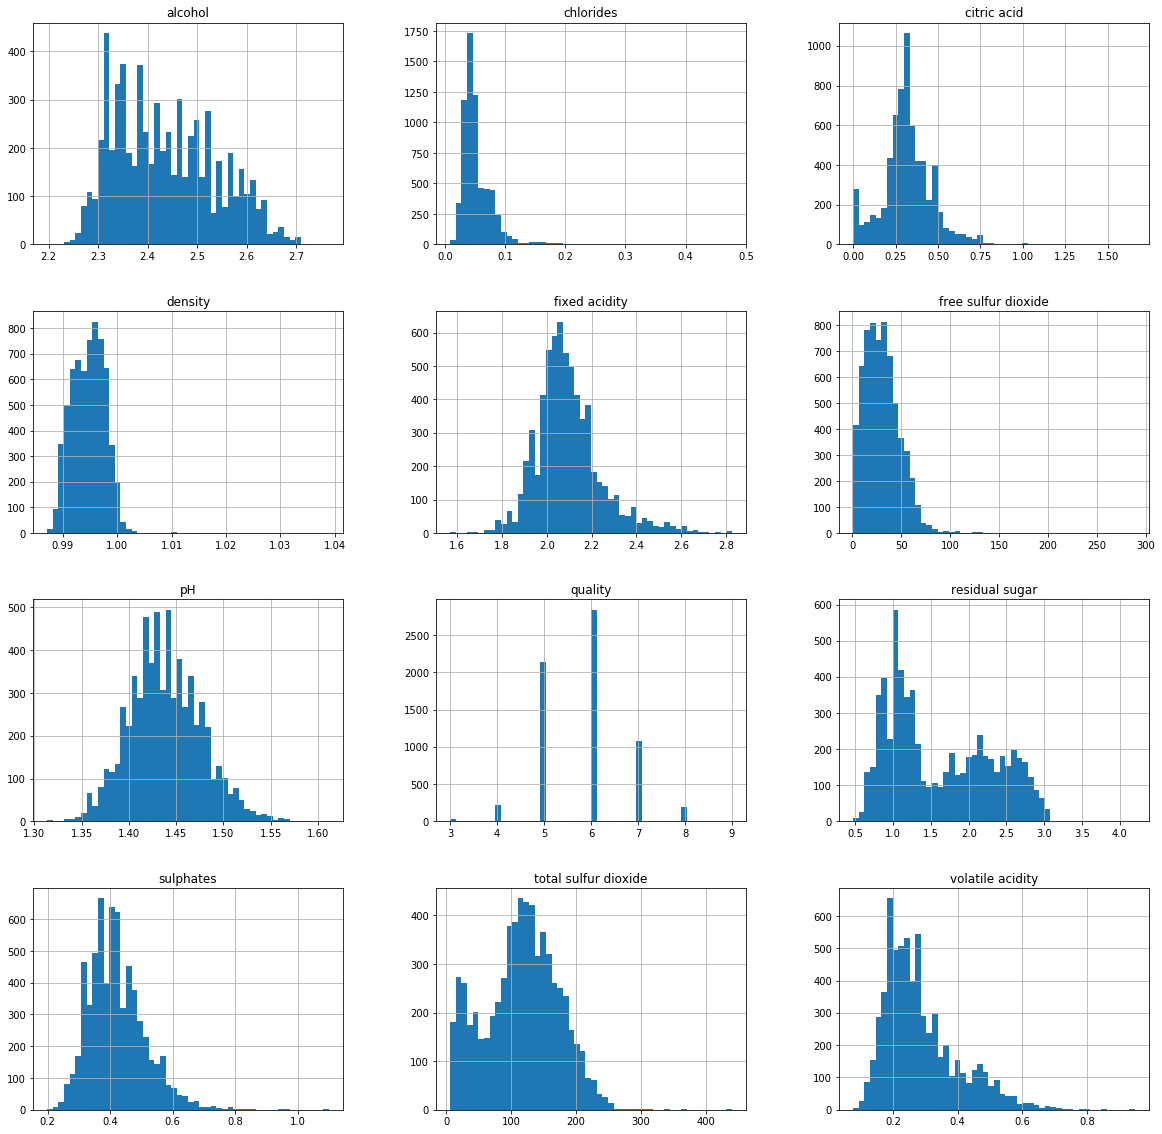

In [605]:
wine.hist(figsize=(20,20), bins=50)

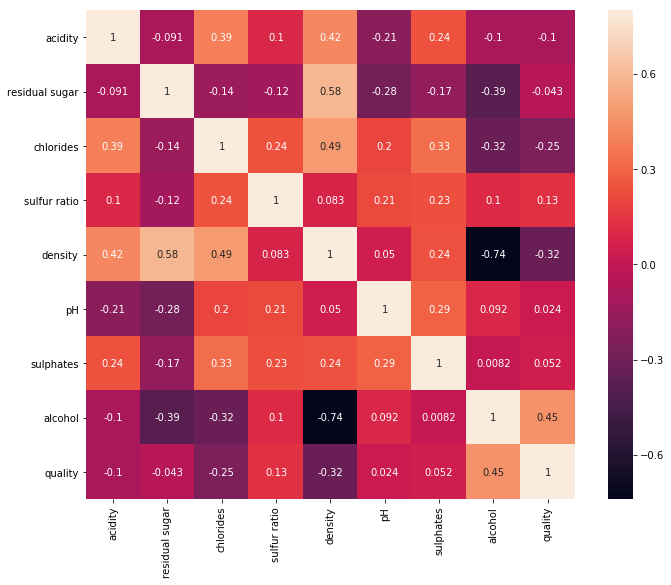

In [577]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [573]:
wine.insert(5, 'sulfur ratio', wine['free sulfur dioxide'] / wine['total sulfur dioxide'])
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

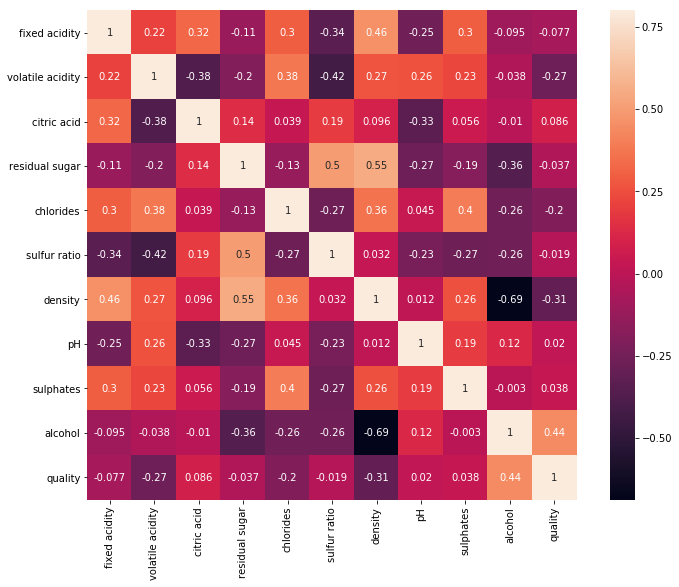

In [290]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [578]:
score5 = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score5.mean())

-0.591119851332


In [575]:
wine.insert(0, 'acidity', wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid'])
wine.drop(['fixed acidity', 'volatile acidity', 'citric acid'], axis=1, inplace=True)

In [369]:
wine.drop(['fixed acidity', 'alcohol'], axis=1, inplace=True)

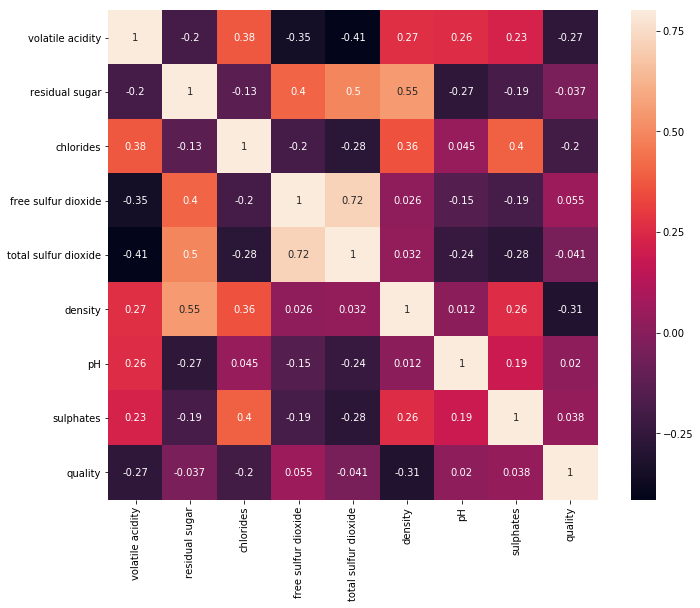

In [370]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [371]:
score6 = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score6.mean())

-0.67676280706


In [372]:
score6.mean() < score0.mean()

True

In [374]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [377]:
quality3 = wine[wine['quality'] == 3]
quality4 = wine[wine['quality'] == 4]
quality5 = wine[wine['quality'] == 5]
quality6 = wine[wine['quality'] == 6]
quality7 = wine[wine['quality'] == 7]
quality8 = wine[wine['quality'] == 8]
quality9 = wine[wine['quality'] == 9]

In [645]:
resampled_wine = []

random_wine = np.random.choice(quality3.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality4.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality5.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality6.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality8.index, 100, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality9.index, 100, replace = True)
resampled_wine.extend(random_wine)




#resampled_wine.extend(np.array(quality6.index))
#resampled_wine.extend(np.array(quality7.index))
#resampled_wine.extend(np.array(quality8.index))
#resampled_wine.extend(np.array(quality9.index))
data = wine.loc[resampled_wine]

In [646]:
len(resampled_wine)

700

In [609]:
len(resampled_wine)

3633

In [610]:
len(data)

3633

In [647]:
data['quality'].value_counts()

9    100
8    100
7    100
6    100
5    100
4    100
3    100
Name: quality, dtype: int64

In [648]:
score6 = cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score6.mean())

-1.25064674289


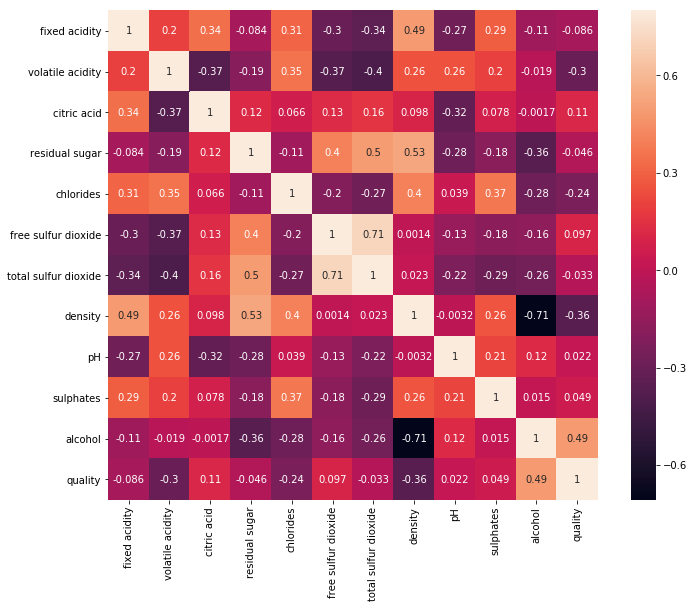

In [454]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [649]:
model = PLSRegression(n_components=10)
model.fit(data.iloc[:,:-1],data.iloc[:,-1])

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

In [650]:
mean_absolute_error(wine.iloc[:,-1], model.predict(wine.iloc[:,:-1]))

0.80151311554165861